# Stock Market Prediction of S&P500IT companies using Machine Learning Techniques

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("S&P500IT.csv")
data

,Date,Price,Open,High,Low,Vol.,Change %
0,06/28/2024,"4,341.1","4,376.9","4,429.2","4,338.8",904.40M,-0.43%
1,06/27/2024,"4,359.8","4,355.0","4,385.9","4,343.4",644.81M,-0.06%
2,06/26/2024,"4,362.6","4,349.7","4,375.0","4,329.6",744.97M,0.37%
3,06/25/2024,"4,346.5","4,300.3","4,352.0","4,286.6",782.95M,1.79%
4,06/24/2024,"4,269.9","4,327.1","4,348.1","4,269.9",894.78M,-2.07%
...,...,...,...,...,...,...,...
4149,01/08/2008,370.6,381.3,385.1,370.5,9.81M,-2.79%
4150,01/07/2008,381.3,384.2,385.4,376.3,10.27M,-0.76%
4151,01/04/2008,384.2,402.3,402.3,383.5,10.67M,-4.51%
4152,01/03/2008,402.3,403.2,404.8,400.0,7.19M,-0.22%


In [3]:
data.shape

(4154, 7)

In [4]:
data=data.drop(columns=['Date'])
data

,Price,Open,High,Low,Vol.,Change %
0,"4,341.1","4,376.9","4,429.2","4,338.8",904.40M,-0.43%
1,"4,359.8","4,355.0","4,385.9","4,343.4",644.81M,-0.06%
2,"4,362.6","4,349.7","4,375.0","4,329.6",744.97M,0.37%
3,"4,346.5","4,300.3","4,352.0","4,286.6",782.95M,1.79%
4,"4,269.9","4,327.1","4,348.1","4,269.9",894.78M,-2.07%
...,...,...,...,...,...,...
4149,370.6,381.3,385.1,370.5,9.81M,-2.79%
4150,381.3,384.2,385.4,376.3,10.27M,-0.76%
4151,384.2,402.3,402.3,383.5,10.67M,-4.51%
4152,402.3,403.2,404.8,400.0,7.19M,-0.22%


In [5]:
data.describe()

,Price,Open,High,Low,Vol.,Change %
count,4154,4154,4154,4154,2528,4154
unique,3559,3570,3528,3572,1834,726
top,354.8,354.8,350.0,417.0,6.77M,0.00%
freq,6,5,5,5,9,34


In [6]:
data.isnull().sum()

Price          0
Open           0
High           0
Low            0
Vol.        1626
Change %       0
dtype: int64

In [7]:
df=data.dropna()
df

,Price,Open,High,Low,Vol.,Change %
0,"4,341.1","4,376.9","4,429.2","4,338.8",904.40M,-0.43%
1,"4,359.8","4,355.0","4,385.9","4,343.4",644.81M,-0.06%
2,"4,362.6","4,349.7","4,375.0","4,329.6",744.97M,0.37%
3,"4,346.5","4,300.3","4,352.0","4,286.6",782.95M,1.79%
4,"4,269.9","4,327.1","4,348.1","4,269.9",894.78M,-2.07%
...,...,...,...,...,...,...
4149,370.6,381.3,385.1,370.5,9.81M,-2.79%
4150,381.3,384.2,385.4,376.3,10.27M,-0.76%
4151,384.2,402.3,402.3,383.5,10.67M,-4.51%
4152,402.3,403.2,404.8,400.0,7.19M,-0.22%


In [8]:
df.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2528 entries, 0 to 4153
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Price     2528 non-null   object
 1   Open      2528 non-null   object
 2   High      2528 non-null   object
 3   Low       2528 non-null   object
 4   Vol.      2528 non-null   object
 5   Change %  2528 non-null   object
dtypes: object(6)
memory usage: 138.2+ KB


In [10]:
df.drop(columns=['Change %'],inplace=True)
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_29212\1658844372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Change %'],inplace=True)


,Price,Open,High,Low,Vol.
0,"4,341.1","4,376.9","4,429.2","4,338.8",904.40M
1,"4,359.8","4,355.0","4,385.9","4,343.4",644.81M
2,"4,362.6","4,349.7","4,375.0","4,329.6",744.97M
3,"4,346.5","4,300.3","4,352.0","4,286.6",782.95M
4,"4,269.9","4,327.1","4,348.1","4,269.9",894.78M
...,...,...,...,...,...
4149,370.6,381.3,385.1,370.5,9.81M
4150,381.3,384.2,385.4,376.3,10.27M
4151,384.2,402.3,402.3,383.5,10.67M
4152,402.3,403.2,404.8,400.0,7.19M


In [11]:
df.sample(10)

,Price,Open,High,Low,Vol.
391,"2,271.9","2,321.5","2,322.8","2,257.2",432.24M
2986,490.0,482.5,490.9,482.5,6.46M
3802,271.7,263.1,272.4,261.2,7.61M
665,"2,857.8","2,834.7","2,864.4","2,834.7",435.28M
3247,391.6,393.9,399.0,379.9,14.33M
3354,428.0,430.9,431.4,425.4,6.98M
3785,283.6,284.9,285.9,282.9,6.81M
240,"3,167.4","3,125.8","3,174.6","3,125.8",387.48M
257,"3,003.8","3,046.9","3,046.9","2,991.0",480.68M
3507,362.0,361.5,363.3,360.2,7.43M


In [12]:
def convert_vol(vol):
    if 'K' in vol:
        return float(vol.replace('K', ''))
    elif 'M' in vol:
        return float(vol.replace('M', '')) * 1000
    elif 'B' in vol:
        return float(vol.replace('B', '')) * 1000000
    else:
        return float(vol)/1000

def convert_to_num(dt):
    if ',' in dt:
        return float(dt.replace(',',''))
    else:
        return float(dt)

In [13]:
df['Volume(K)']=df['Vol.'].apply(convert_vol)
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_29212\3236443624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Volume(K)']=df['Vol.'].apply(convert_vol)


,Price,Open,High,Low,Vol.,Volume(K)
0,"4,341.1","4,376.9","4,429.2","4,338.8",904.40M,904400.0
1,"4,359.8","4,355.0","4,385.9","4,343.4",644.81M,644810.0
2,"4,362.6","4,349.7","4,375.0","4,329.6",744.97M,744970.0
3,"4,346.5","4,300.3","4,352.0","4,286.6",782.95M,782950.0
4,"4,269.9","4,327.1","4,348.1","4,269.9",894.78M,894780.0
...,...,...,...,...,...,...
4149,370.6,381.3,385.1,370.5,9.81M,9810.0
4150,381.3,384.2,385.4,376.3,10.27M,10270.0
4151,384.2,402.3,402.3,383.5,10.67M,10670.0
4152,402.3,403.2,404.8,400.0,7.19M,7190.0


In [14]:
df['Price']=df['Price'].apply(convert_to_num)
df['Open']=df['Open'].apply(convert_to_num)
df['High']=df['High'].apply(convert_to_num)
df['Low']=df['Low'].apply(convert_to_num)
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_29212\1879019303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price']=df['Price'].apply(convert_to_num)
C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_29212\1879019303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open']=df['Open'].apply(convert_to_num)
C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_29212\1879019303.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

,Price,Open,High,Low,Vol.,Volume(K)
0,4341.1,4376.9,4429.2,4338.8,904.40M,904400.0
1,4359.8,4355.0,4385.9,4343.4,644.81M,644810.0
2,4362.6,4349.7,4375.0,4329.6,744.97M,744970.0
3,4346.5,4300.3,4352.0,4286.6,782.95M,782950.0
4,4269.9,4327.1,4348.1,4269.9,894.78M,894780.0
...,...,...,...,...,...,...
4149,370.6,381.3,385.1,370.5,9.81M,9810.0
4150,381.3,384.2,385.4,376.3,10.27M,10270.0
4151,384.2,402.3,402.3,383.5,10.67M,10670.0
4152,402.3,403.2,404.8,400.0,7.19M,7190.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2528 entries, 0 to 4153
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      2528 non-null   float64
 1   Open       2528 non-null   float64
 2   High       2528 non-null   float64
 3   Low        2528 non-null   float64
 4   Vol.       2528 non-null   object 
 5   Volume(K)  2528 non-null   float64
dtypes: float64(5), object(1)
memory usage: 138.2+ KB


In [16]:
df.drop(columns=['Vol.'], inplace=True)
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_29212\1067798956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Vol.'], inplace=True)


,Price,Open,High,Low,Volume(K)
0,4341.1,4376.9,4429.2,4338.8,904400.0
1,4359.8,4355.0,4385.9,4343.4,644810.0
2,4362.6,4349.7,4375.0,4329.6,744970.0
3,4346.5,4300.3,4352.0,4286.6,782950.0
4,4269.9,4327.1,4348.1,4269.9,894780.0
...,...,...,...,...,...
4149,370.6,381.3,385.1,370.5,9810.0
4150,381.3,384.2,385.4,376.3,10270.0
4151,384.2,402.3,402.3,383.5,10670.0
4152,402.3,403.2,404.8,400.0,7190.0


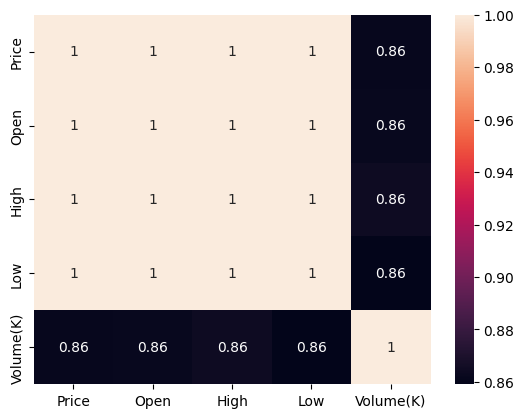

In [17]:
sns.heatmap(df.corr(),annot=True)
plt.show()

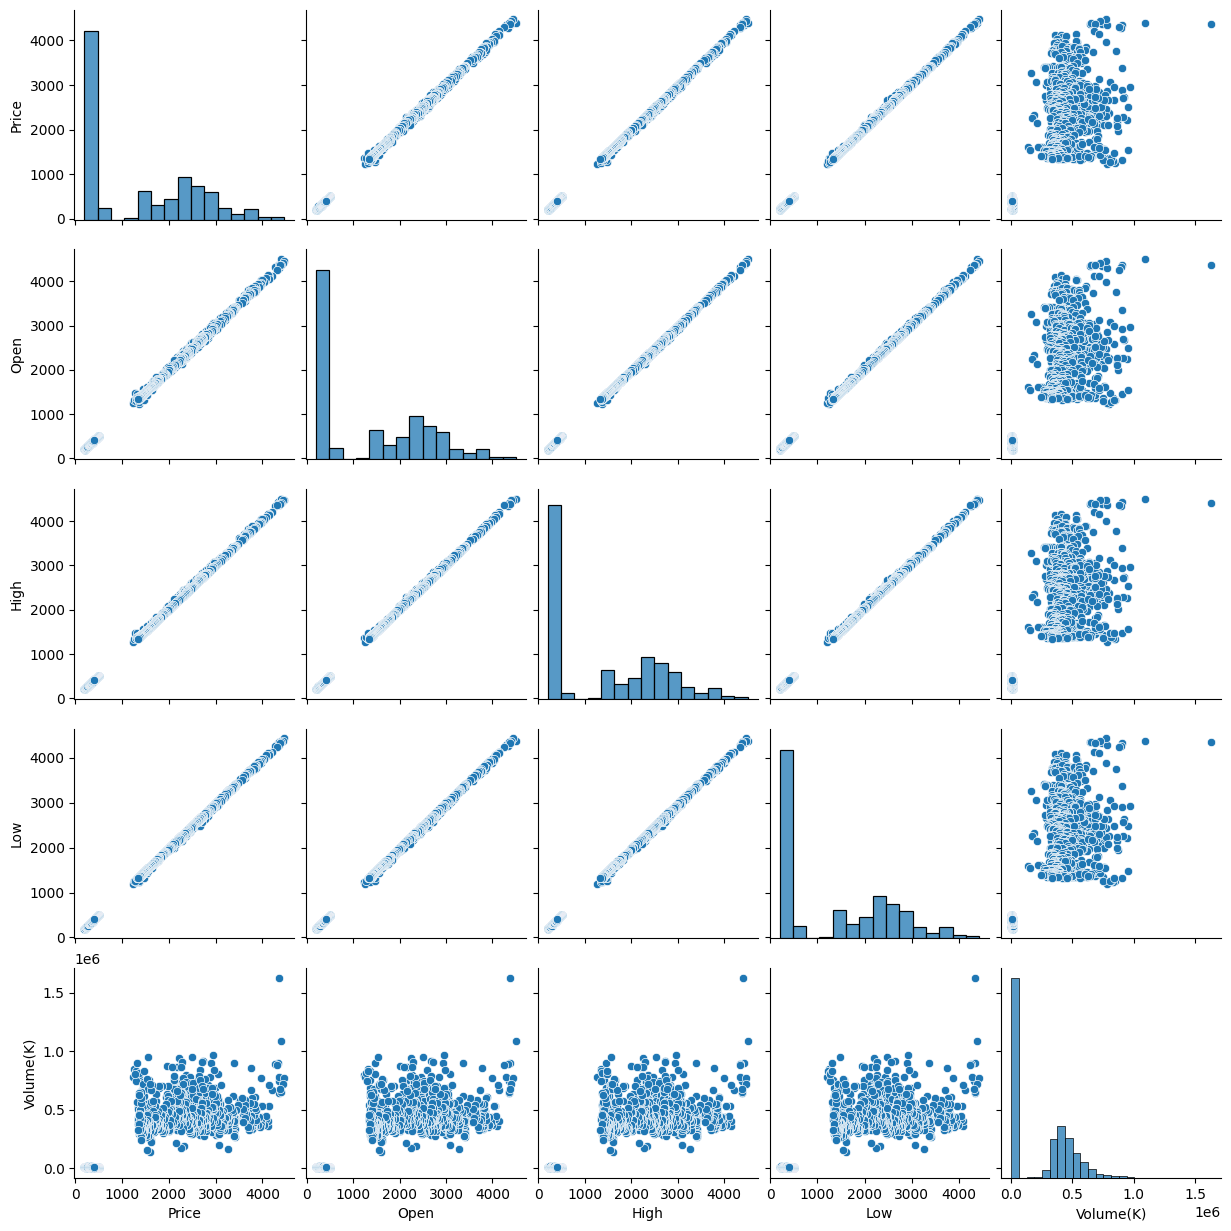

In [18]:
sns.pairplot(df,kind='scatter')
plt.show()

## Simple Linear Regression

## Taking Open as independent feature and close as dependent fearture

<function matplotlib.pyplot.show(close=None, block=None)>

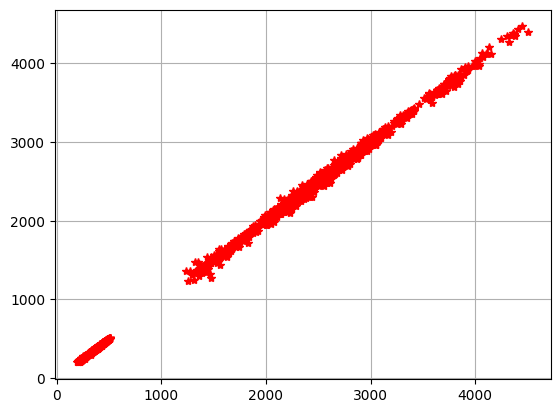

In [19]:
plt.plot(df['Open'],df['Price'],'r*')
plt.grid(True)
plt.show

In [20]:
X=df[['Open']]
X

,Open
0,4376.9
1,4355.0
2,4349.7
3,4300.3
4,4327.1
...,...
4149,381.3
4150,384.2
4151,402.3
4152,403.2


In [21]:
y=df['Price']
y

0       4341.1
1       4359.8
2       4362.6
3       4346.5
4       4269.9
         ...  
4149     370.6
4150     381.3
4151     384.2
4152     402.3
4153     403.2
Name: Price, Length: 2528, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [24]:
lr.fit(X_train,y_train)

LinearRegression()

In [25]:
print(f"Coefficient : {lr.coef_}\nintercept : {lr.intercept_}")

Coefficient : [1.00049591]
intercept : 0.24710224854652552


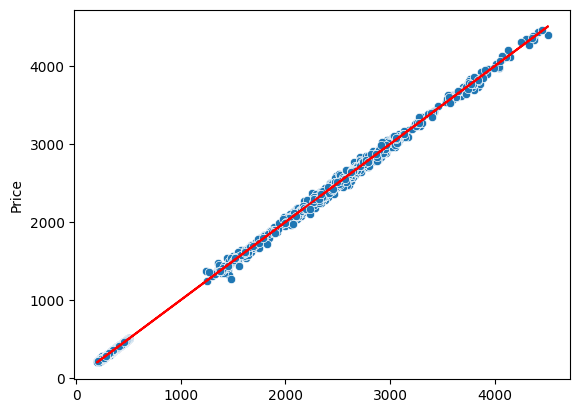

In [26]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lr.predict(X_train),color='red')
plt.show()

In [27]:
pred=lr.predict(X_test)

In [28]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [29]:
import math
def find_RMSE(pred,actual):
    return math.sqrt(mean_squared_error(actual,pred))

def find_adj_r2(pred,actual):
    return 1-((1-r2_score(pred,actual))*(len(actual)-1)/(len(actual)-X_train.shape[1]-1))

In [30]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 15.695752803676529
MSE : 688.0402290163361
RMSE : 26.230520944432957
R2 : 0.9994496653549169
Adj R2 : 0.9994494196855502


In [31]:
lr_mae=mean_absolute_error(y_test,pred)
lr_rmse=find_RMSE(pred,y_test)
lr_r2=r2_score(y_test,pred)

In [32]:
dt={
    'Simple_LinearReg' : [mean_absolute_error(y_test,pred)]}
mean_abs_err=pd.DataFrame(dt)
mean_abs_err

,Simple_LinearReg
0,15.695753


In [33]:
dt={
    'Simple_LinearReg' : [find_RMSE(pred,y_test)]
}
root_mean_sq_err=pd.DataFrame(dt)
root_mean_sq_err

,Simple_LinearReg
0,26.230521


In [34]:
dt={
    'Simple_LinearReg' : [r2_score(y_test,pred)]
}
R2_score=pd.DataFrame(dt)
R2_score

,Simple_LinearReg
0,0.99945


## Ridge Regression

In [35]:
from sklearn.linear_model import Ridge

In [36]:
rr=Ridge(alpha=0.1)

In [37]:
rr.fit(X_train,y_train)

Ridge(alpha=0.1)

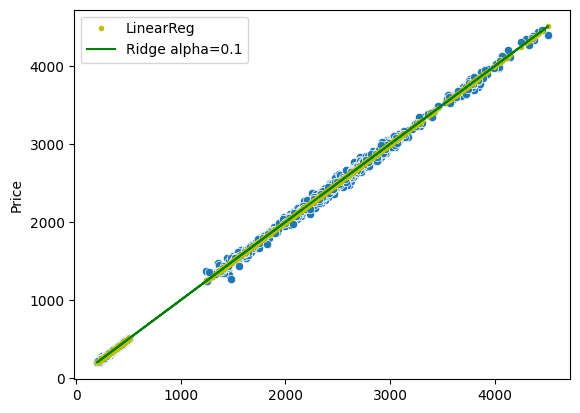

In [38]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lr.predict(X_train),'y.',label='LinearReg')
plt.plot(X_val,rr.predict(X_train),color='green',label='Ridge alpha=0.1')
plt.legend()
plt.show()

In [39]:
print(rr.coef_,rr.intercept_)

[1.00049591] 0.24710230861865057


In [40]:
y_pred=rr.predict(X_test)

In [41]:
print(f"MAE : {mean_absolute_error(y_test,y_pred)}\nMSE : {mean_squared_error(y_test,y_pred)}\nRMSE : {find_RMSE(y_pred,y_test)}\nR2 : {r2_score(y_test,y_pred)}\nAdj R2 : {find_adj_r2(y_pred,y_test)}")

MAE : 15.695752804197014
MSE : 688.0402289428716
RMSE : 26.230520943032595
R2 : 0.9994496653549756
Adj R2 : 0.9994494196855628


In [42]:
rr_mae=mean_absolute_error(y_test,y_pred)
rr_rmse=find_RMSE(y_pred,y_test)
rr_r2=r2_score(y_test,y_pred)

In [43]:
mean_abs_err['Ridge_alpha_0.1']=[mean_absolute_error(y_test,y_pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1
0,15.695753,15.695753


In [44]:
root_mean_sq_err['Ridge_alpha_0.1']=[find_RMSE(y_pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1
0,26.230521,26.230521


In [45]:
R2_score['Ridge_alpha_0.1']=[r2_score(y_test,y_pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1
0,0.99945,0.99945


## Lasso Regression

In [46]:
from sklearn.linear_model import Lasso

In [47]:
lsr=Lasso(alpha=0.1)

In [48]:
lsr.fit(X_train,y_train)

Lasso(alpha=0.1)

In [49]:
print(lsr.coef_,lsr.intercept_)

[1.00049584] 0.24720846640116179


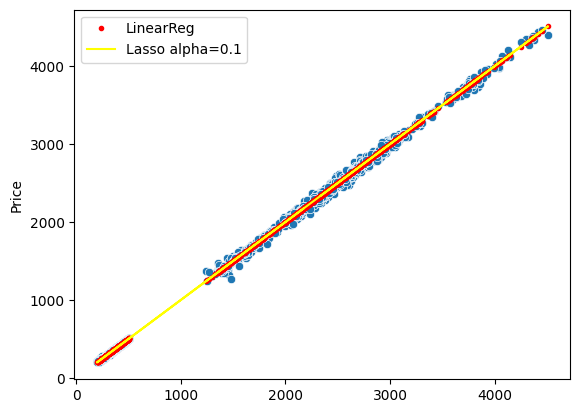

In [50]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lr.predict(X_train),'r.',label='LinearReg')
plt.plot(X_val,lsr.predict(X_train),color='yellow',label='Lasso alpha=0.1')
plt.legend()
plt.show()

In [51]:
yl_pred=lsr.predict(X_test)

In [52]:
print(f"MAE : {mean_absolute_error(y_test,yl_pred)}\nMSE : {mean_squared_error(y_test,yl_pred)}\nRMSE : {find_RMSE(yl_pred,y_test)}\nR2 : {r2_score(y_test,yl_pred)}\nAdj R2 : {find_adj_r2(yl_pred,y_test)}")

MAE : 15.695753723986332
MSE : 688.0400991262682
RMSE : 26.23051846849902
R2 : 0.9994496654588105
Adj R2 : 0.9994494197076852


In [53]:
lsr_mae=mean_absolute_error(y_test,yl_pred)
lsr_rmse=find_RMSE(yl_pred,y_test)
lsr_r2=r2_score(y_test,yl_pred)

In [54]:
mean_abs_err['Lasso_alpha_0.1']=[mean_absolute_error(y_test,yl_pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1
0,15.695753,15.695753,15.695754


In [55]:
root_mean_sq_err['Lasso_alpha_0.1']=[find_RMSE(yl_pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1
0,26.230521,26.230521,26.230518


In [56]:
R2_score['Lasso_alpha_0.1']=[r2_score(y_test,yl_pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1
0,0.99945,0.99945,0.99945


## Polynomial Regression

In [57]:
from sklearn.preprocessing import PolynomialFeatures

In [58]:
poly=PolynomialFeatures(degree=4)

In [59]:
X_poly = poly.fit_transform(X_train)
X_test1=poly.transform(X_test)
poly.fit(X_poly,y_train)
lin=LinearRegression()
lin.fit(X_poly,y_train)

LinearRegression()

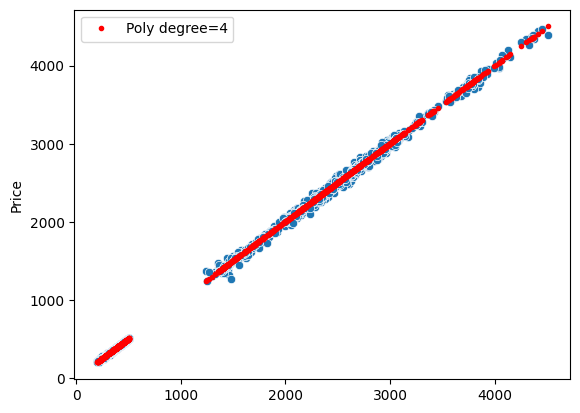

In [60]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lin.predict(X_poly),'r.',label='Poly degree=4')
plt.legend()
plt.show()

In [61]:
yp_pred=lin.predict(X_test1)

In [62]:
print(f"MAE : {mean_absolute_error(y_test,yp_pred)}\nMSE : {mean_squared_error(y_test,yp_pred)}\nRMSE : {find_RMSE(yp_pred,y_test)}\nR2 : {r2_score(y_test,yp_pred)}\nAdj R2 : {find_adj_r2(yp_pred,y_test)}")

MAE : 15.680733709753854
MSE : 688.3296134859523
RMSE : 26.236036543006115
R2 : 0.9994494338883649
Adj R2 : 0.999449387261457


In [63]:
poly_mae=mean_absolute_error(y_test,yp_pred)
poly_rmse=find_RMSE(yp_pred,y_test)
poly_r2=r2_score(y_test,yp_pred)

In [64]:
mean_abs_err['Poly_deg_4']=[mean_absolute_error(y_test,yp_pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4
0,15.695753,15.695753,15.695754,15.680734


In [65]:
root_mean_sq_err['Poly_deg_4']=[find_RMSE(yp_pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4
0,26.230521,26.230521,26.230518,26.236037


In [66]:
R2_score['Poly_deg_4']=r2_score(y_test,yp_pred)
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4
0,0.99945,0.99945,0.99945,0.999449


## Ridge on Polynomial Regression

In [67]:
ridp=Ridge(alpha=0.1)
ridp.fit(X_poly,y_train)

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.86424e-32): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=0.1)

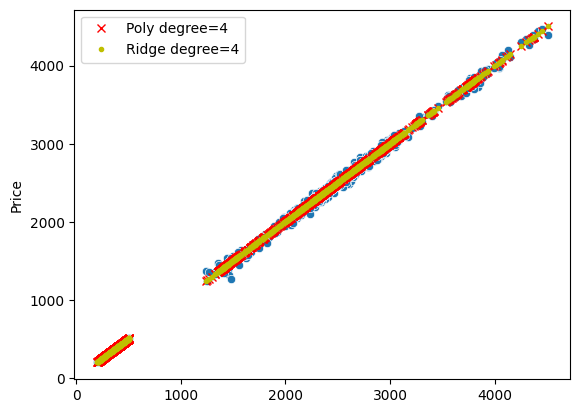

In [68]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lin.predict(X_poly),'rx',label='Poly degree=4')
plt.plot(X_val,ridp.predict(X_poly),'y.',label='Ridge degree=4')
plt.legend()
plt.show()

In [69]:
yr_pred=ridp.predict(X_test1)

In [70]:
print(f"MAE : {mean_absolute_error(y_test,yr_pred)}\nMSE : {mean_squared_error(y_test,yr_pred)}\nRMSE : {find_RMSE(yr_pred,y_test)}\nR2 : {r2_score(y_test,yr_pred)}\nAdj R2 : {find_adj_r2(yr_pred,y_test)}")

MAE : 15.68093653520802
MSE : 688.3413051961547
RMSE : 26.236259359827855
R2 : 0.9994494245366542
Adj R2 : 0.9994493820175564


In [71]:
prr_mae=mean_absolute_error(y_test,yr_pred)
prr_rmse=find_RMSE(yr_pred,y_test)
prr_r2=r2_score(y_test,yr_pred)

In [72]:
mean_abs_err['Ridge_0.1_Poly_4']=[mean_absolute_error(y_test,yr_pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4
0,15.695753,15.695753,15.695754,15.680734,15.680937


In [73]:
root_mean_sq_err['Ridge_0.1_Poly_4']=[find_RMSE(yr_pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4
0,26.230521,26.230521,26.230518,26.236037,26.236259


In [74]:
R2_score['Ridge_0.1_Poly_4']=[r2_score(y_test,yr_pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4
0,0.99945,0.99945,0.99945,0.999449,0.999449


## Lasso on polynomial of degree 4

In [75]:
lsp=Lasso(alpha=0.1)
lsp.fit(X_poly,y_train)

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.512e+05, tolerance: 2.384e+05
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

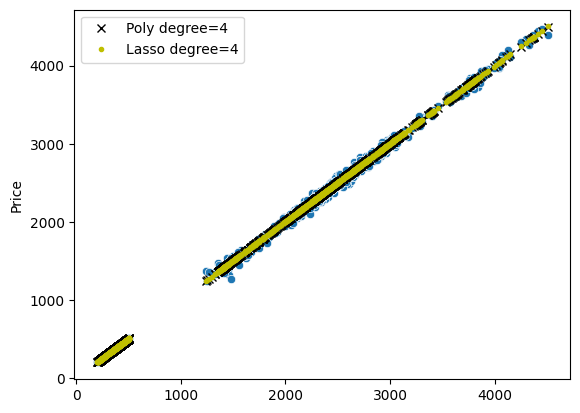

In [76]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lin.predict(X_poly),'kx',label='Poly degree=4')
plt.plot(X_val,lsp.predict(X_poly),'y.',label='Lasso degree=4')
plt.legend()
plt.show()

In [77]:
yl_pred=lsp.predict(X_test1)

In [78]:
print(f"MAE : {mean_absolute_error(y_test,yl_pred)}\nMSE : {mean_squared_error(y_test,yl_pred)}\nRMSE : {find_RMSE(yl_pred,y_test)}\nR2 : {r2_score(y_test,yl_pred)}\nAdj R2 : {find_adj_r2(yl_pred,y_test)}")

MAE : 15.682768430426025
MSE : 688.387960011086
RMSE : 26.237148473320914
R2 : 0.9994493872194162
Adj R2 : 0.9994493414292267


In [79]:
plsr_mae=mean_absolute_error(y_test,yl_pred)
plsr_rmse=find_RMSE(yl_pred,y_test)
plsr_r2=r2_score(y_test,yl_pred)

In [80]:
mean_abs_err['Lasso_0.1_Poly_4']=[mean_absolute_error(y_test,yl_pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4
0,15.695753,15.695753,15.695754,15.680734,15.680937,15.682768


In [81]:
root_mean_sq_err['Lasso_0.1_Poly_4']=[find_RMSE(yl_pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4
0,26.230521,26.230521,26.230518,26.236037,26.236259,26.237148


In [82]:
R2_score['Lasso_0.1_Poly_4']=[r2_score(y_test,yl_pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4
0,0.99945,0.99945,0.99945,0.999449,0.999449,0.999449


## Multiple Linear Regression

In [83]:
df

,Price,Open,High,Low,Volume(K)
0,4341.1,4376.9,4429.2,4338.8,904400.0
1,4359.8,4355.0,4385.9,4343.4,644810.0
2,4362.6,4349.7,4375.0,4329.6,744970.0
3,4346.5,4300.3,4352.0,4286.6,782950.0
4,4269.9,4327.1,4348.1,4269.9,894780.0
...,...,...,...,...,...
4149,370.6,381.3,385.1,370.5,9810.0
4150,381.3,384.2,385.4,376.3,10270.0
4151,384.2,402.3,402.3,383.5,10670.0
4152,402.3,403.2,404.8,400.0,7190.0


In [84]:
df.drop(columns=['High','Low'],inplace=True)
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_29212\4086614560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['High','Low'],inplace=True)


,Price,Open,Volume(K)
0,4341.1,4376.9,904400.0
1,4359.8,4355.0,644810.0
2,4362.6,4349.7,744970.0
3,4346.5,4300.3,782950.0
4,4269.9,4327.1,894780.0
...,...,...,...
4149,370.6,381.3,9810.0
4150,381.3,384.2,10270.0
4151,384.2,402.3,10670.0
4152,402.3,403.2,7190.0


In [85]:
X=df.drop(columns=['Price'])
X

,Open,Volume(K)
0,4376.9,904400.0
1,4355.0,644810.0
2,4349.7,744970.0
3,4300.3,782950.0
4,4327.1,894780.0
...,...,...
4149,381.3,9810.0
4150,384.2,10270.0
4151,402.3,10670.0
4152,403.2,7190.0


In [86]:
y=df['Price']
y

0       4341.1
1       4359.8
2       4362.6
3       4346.5
4       4269.9
         ...  
4149     370.6
4150     381.3
4151     384.2
4152     402.3
4153     403.2
Name: Price, Length: 2528, dtype: float64

In [87]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [88]:
mlin=LinearRegression()
mlin.fit(X_train,y_train)

LinearRegression()

In [89]:
cdf=pd.DataFrame(mlin.coef_,X.columns,columns=['coef_lin'])
cdf

,coef_lin
Open,1.002138
Volume(K),-0.000009


In [90]:
mlin.intercept_

0.027620772460977605

In [91]:
pred=mlin.predict(X_test)

In [92]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 15.717978630586842
MSE : 688.8420958911562
RMSE : 26.24580149073669
R2 : 0.9994490239750915
Adj R2 : 0.9994480030143271


In [93]:
mlr_mae=mean_absolute_error(y_test,pred)
mlr_rmse=find_RMSE(pred,y_test)
mlr_r2=r2_score(y_test,pred)

In [94]:
mean_abs_err['Mul_LinearReg']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg
0,15.695753,15.695753,15.695754,15.680734,15.680937,15.682768,15.717979


In [95]:
root_mean_sq_err['Mul_LinearReg'] = [find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg
0,26.230521,26.230521,26.230518,26.236037,26.236259,26.237148,26.245801


In [96]:
R2_score['Mul_LinearReg']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg
0,0.99945,0.99945,0.99945,0.999449,0.999449,0.999449,0.999449


## Applying Ridge Regression on Multiple Linear Regression

In [97]:
ridm=Ridge(alpha=0.1)
ridm.fit(X_train,y_train)

Ridge(alpha=0.1)

In [98]:
cdf['coef_ridge']=ridm.coef_
cdf

,coef_lin,coef_ridge
Open,1.002138,1.002138
Volume(K),-0.000009,-0.000009


In [99]:
ridm.intercept_

0.027620848847391244

In [100]:
pred=ridm.predict(X_test)

In [101]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 15.717978628495866
MSE : 688.8420956730073
RMSE : 26.245801486580806
R2 : 0.9994490239752659
Adj R2 : 0.9994480030144588


In [102]:
mrr_mae=mean_absolute_error(y_test,pred)
mrr_rmse=find_RMSE(pred,y_test)
mrr_r2=r2_score(y_test,pred)

In [103]:
mean_abs_err['Mul_Ridge_0.1']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1
0,15.695753,15.695753,15.695754,15.680734,15.680937,15.682768,15.717979,15.717979


In [104]:
root_mean_sq_err['Mul_Ridge_0.1']=[find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1
0,26.230521,26.230521,26.230518,26.236037,26.236259,26.237148,26.245801,26.245801


In [105]:
R2_score['Mul_Ridge_0.1']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1
0,0.99945,0.99945,0.99945,0.999449,0.999449,0.999449,0.999449,0.999449


## Applying Lasso Regression on Multiple Linear Regression

In [106]:
lso=Lasso(alpha=0.1)
lso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [107]:
cdf['coef_lasso']=lso.coef_
cdf

,coef_lin,coef_ridge,coef_lasso
Open,1.002138,1.002138,1.002137
Volume(K),-0.000009,-0.000009,-0.000009


In [108]:
lso.intercept_

0.02793871485141608

In [109]:
pred=lso.predict(X_test)

In [110]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 15.717969894089675
MSE : 688.8411870669034
RMSE : 26.24578417702362
R2 : 0.999449024702022
Adj R2 : 0.9994480035632765


In [111]:
mlsr_mae=mean_absolute_error(y_test,pred)
mlsr_rmse=find_RMSE(pred,y_test)
mlsr_r2=r2_score(y_test,pred)

In [112]:
mean_abs_err['Mul_Lasso_0.1']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1
0,15.695753,15.695753,15.695754,15.680734,15.680937,15.682768,15.717979,15.717979,15.71797


In [113]:
root_mean_sq_err['Mul_Lasso_0.1']=[find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1
0,26.230521,26.230521,26.230518,26.236037,26.236259,26.237148,26.245801,26.245801,26.245784


In [114]:
R2_score['Mul_Lasso_0.1']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1
0,0.99945,0.99945,0.99945,0.999449,0.999449,0.999449,0.999449,0.999449,0.999449


## adding more Features

In [115]:
df

,Price,Open,Volume(K)
0,4341.1,4376.9,904400.0
1,4359.8,4355.0,644810.0
2,4362.6,4349.7,744970.0
3,4346.5,4300.3,782950.0
4,4269.9,4327.1,894780.0
...,...,...,...
4149,370.6,381.3,9810.0
4150,381.3,384.2,10270.0
4151,384.2,402.3,10670.0
4152,402.3,403.2,7190.0


In [116]:
df['7DaysMavg']=df['Price'].rolling(window=7).mean().fillna(method='bfill')
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_29212\2831065476.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['7DaysMavg']=df['Price'].rolling(window=7).mean().fillna(method='bfill')
C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_29212\2831065476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['7DaysMavg']=df['Price'].rolling(window=7).mean().fillna(method='bfill')


,Price,Open,Volume(K),7DaysMavg
0,4341.1,4376.9,904400.0,4348.171429
1,4359.8,4355.0,644810.0,4348.171429
2,4362.6,4349.7,744970.0,4348.171429
3,4346.5,4300.3,782950.0,4348.171429
4,4269.9,4327.1,894780.0,4348.171429
...,...,...,...,...
4149,370.6,381.3,9810.0,374.614286
4150,381.3,384.2,10270.0,376.928571
4151,384.2,402.3,10670.0,378.500000
4152,402.3,403.2,7190.0,381.371429


In [117]:
df['14DaysMavg']=df['Price'].rolling(window=14).mean().fillna(method='bfill')
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_29212\1927853552.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['14DaysMavg']=df['Price'].rolling(window=14).mean().fillna(method='bfill')
C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_29212\1927853552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['14DaysMavg']=df['Price'].rolling(window=14).mean().fillna(method='bfill')


,Price,Open,Volume(K),7DaysMavg,14DaysMavg
0,4341.1,4376.9,904400.0,4348.171429,4339.471429
1,4359.8,4355.0,644810.0,4348.171429,4339.471429
2,4362.6,4349.7,744970.0,4348.171429,4339.471429
3,4346.5,4300.3,782950.0,4348.171429,4339.471429
4,4269.9,4327.1,894780.0,4348.171429,4339.471429
...,...,...,...,...,...
4149,370.6,381.3,9810.0,374.614286,364.992857
4150,381.3,384.2,10270.0,376.928571,366.864286
4151,384.2,402.3,10670.0,378.500000,369.050000
4152,402.3,403.2,7190.0,381.371429,372.085714


In [118]:
delta=df['Price'].diff()
gain=delta.where(delta>0,0)
loss=delta.where(delta<0,0)
avg_gain=gain.rolling(window=14).mean()
avg_loss=loss.rolling(window=14).mean()
rs=avg_gain/avg_loss
df['RSI']=100-(100/(1+rs))
df['RSI'].fillna(method='bfill',inplace=True)
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_29212\3173424381.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI']=100-(100/(1+rs))
C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_29212\3173424381.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RSI']

,Price,Open,Volume(K),7DaysMavg,14DaysMavg,RSI
0,4341.1,4376.9,904400.0,4348.171429,4339.471429,-107.421875
1,4359.8,4355.0,644810.0,4348.171429,4339.471429,-107.421875
2,4362.6,4349.7,744970.0,4348.171429,4339.471429,-107.421875
3,4346.5,4300.3,782950.0,4348.171429,4339.471429,-107.421875
4,4269.9,4327.1,894780.0,4348.171429,4339.471429,-107.421875
...,...,...,...,...,...,...
4149,370.6,381.3,9810.0,374.614286,364.992857,310.967742
4150,381.3,384.2,10270.0,376.928571,366.864286,224.809160
4151,384.2,402.3,10670.0,378.500000,369.050000,201.960784
4152,402.3,403.2,7190.0,381.371429,372.085714,173.411765


<Axes: >

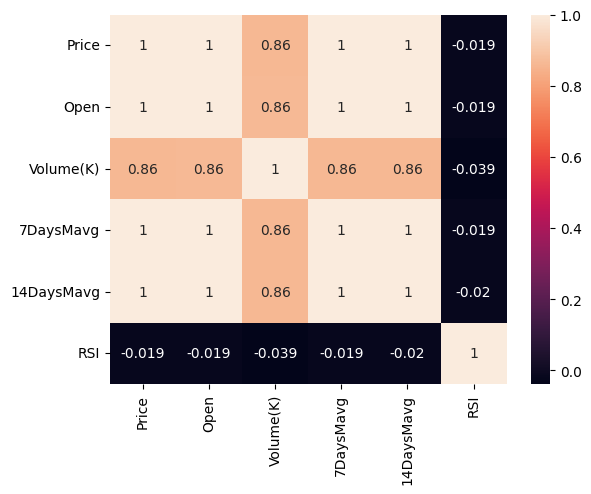

In [119]:
sns.heatmap(df.corr(),annot=True)

In [120]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df=df.dropna()
df.isnull().sum()

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_29212\387178503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace([np.inf, -np.inf], np.nan, inplace=True)


Price         0
Open          0
Volume(K)     0
7DaysMavg     0
14DaysMavg    0
RSI           0
dtype: int64

In [121]:
X=df.drop(columns='Price')
X

,Open,Volume(K),7DaysMavg,14DaysMavg,RSI
0,4376.9,904400.0,4348.171429,4339.471429,-107.421875
1,4355.0,644810.0,4348.171429,4339.471429,-107.421875
2,4349.7,744970.0,4348.171429,4339.471429,-107.421875
3,4300.3,782950.0,4348.171429,4339.471429,-107.421875
4,4327.1,894780.0,4348.171429,4339.471429,-107.421875
...,...,...,...,...,...
4149,381.3,9810.0,374.614286,364.992857,310.967742
4150,384.2,10270.0,376.928571,366.864286,224.809160
4151,402.3,10670.0,378.500000,369.050000,201.960784
4152,403.2,7190.0,381.371429,372.085714,173.411765


In [122]:
y=df['Price']
y

0       4341.1
1       4359.8
2       4362.6
3       4346.5
4       4269.9
         ...  
4149     370.6
4150     381.3
4151     384.2
4152     402.3
4153     403.2
Name: Price, Length: 2525, dtype: float64

In [123]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [124]:
mlin=LinearRegression()
mlin.fit(X_train,y_train)

LinearRegression()

In [125]:
cdf1=pd.DataFrame(mlin.coef_,X.columns,columns=['coef_lin'])
cdf1

,coef_lin
Open,0.698690
Volume(K),-0.000005
7DaysMavg,0.480079
14DaysMavg,-0.177597
RSI,0.000002


In [126]:
mlin.intercept_

-0.04853166458360647

In [127]:
pred=mlin.predict(X_test)

In [128]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 13.449801503193562
MSE : 491.7805580949489
RMSE : 22.176125858565758
R2 : 0.9996099135007263
Adj R2 : 0.9996077598856572


In [129]:
mean_abs_err['Mul_LinearReg+']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+
0,15.695753,15.695753,15.695754,15.680734,15.680937,15.682768,15.717979,15.717979,15.71797,13.449802


In [130]:
root_mean_sq_err['Mul_LinearReg+'] = [find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+
0,26.230521,26.230521,26.230518,26.236037,26.236259,26.237148,26.245801,26.245801,26.245784,22.176126


In [131]:
R2_score['Mul_LinearReg+']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+
0,0.99945,0.99945,0.99945,0.999449,0.999449,0.999449,0.999449,0.999449,0.999449,0.99961


## Ridge

In [132]:
ridm=Ridge(alpha=0.1)
ridm.fit(X_train,y_train)

Ridge(alpha=0.1)

In [133]:
cdf1['coef_ridge']=ridm.coef_
cdf1

,coef_lin,coef_ridge
Open,0.698690,0.698690
Volume(K),-0.000005,-0.000005
7DaysMavg,0.480079,0.480079
14DaysMavg,-0.177597,-0.177596
RSI,0.000002,0.000002


In [134]:
ridm.intercept_

-0.04853167433930139

In [135]:
pred=ridm.predict(X_test)

In [136]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 13.44980142195315
MSE : 491.7805515907184
RMSE : 22.17612571191637
R2 : 0.9996099135058855
Adj R2 : 0.9996077598908313


In [137]:
mean_abs_err['Mul_Ridge_0.1+']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+
0,15.695753,15.695753,15.695754,15.680734,15.680937,15.682768,15.717979,15.717979,15.71797,13.449802,13.449801


In [138]:
root_mean_sq_err['Mul_Ridge_0.1+']=[find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+
0,26.230521,26.230521,26.230518,26.236037,26.236259,26.237148,26.245801,26.245801,26.245784,22.176126,22.176126


In [139]:
R2_score['Mul_Ridge_0.1+']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+
0,0.99945,0.99945,0.99945,0.999449,0.999449,0.999449,0.999449,0.999449,0.999449,0.99961,0.99961


## Lasso

In [140]:
lso=Lasso(alpha=0.1)
lso.fit(X_train,y_train)

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.946e+05, tolerance: 2.372e+05
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [141]:
cdf1['coef_lasso']=lso.coef_
cdf1

,coef_lin,coef_ridge,coef_lasso
Open,0.698690,0.698690,0.796674
Volume(K),-0.000005,-0.000005,-0.000006
7DaysMavg,0.480079,0.480079,0.255026
14DaysMavg,-0.177597,-0.177596,-0.050447
RSI,0.000002,0.000002,0.000020


In [142]:
lso.intercept_

-0.2321630705057487

In [143]:
pred=lso.predict(X_test)

In [144]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 13.81317441990621
MSE : 511.6107167120709
RMSE : 22.61881333562994
R2 : 0.9995941839704964
Adj R2 : 0.9995919932196454


In [145]:
mean_abs_err['Mul_Lasso_0.1+']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+,Mul_Lasso_0.1+
0,15.695753,15.695753,15.695754,15.680734,15.680937,15.682768,15.717979,15.717979,15.71797,13.449802,13.449801,13.813174


In [146]:
root_mean_sq_err['Mul_Lasso_0.1+']=[find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+,Mul_Lasso_0.1+
0,26.230521,26.230521,26.230518,26.236037,26.236259,26.237148,26.245801,26.245801,26.245784,22.176126,22.176126,22.618813


In [147]:
R2_score['Mul_Lasso_0.1+']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+,Mul_Lasso_0.1+
0,0.99945,0.99945,0.99945,0.999449,0.999449,0.999449,0.999449,0.999449,0.999449,0.99961,0.99961,0.999594
